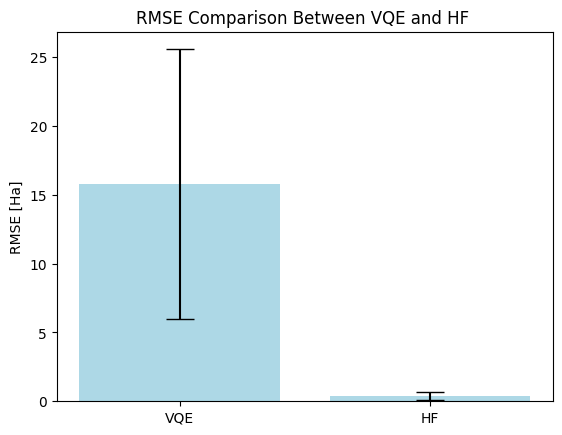

In [7]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Data from the two tables
data1 = {
    "Molecule": ["H2", "O2", "NH3+", "COOH-", "C2H5NO2"],
    "Calculated Energy [Ha]": [-1.14, -131.61, -51.18, -172.36, -251.02],
    "Ground State Energy [Ha]": [-1.12, -147.63, -55.46, -185.62, -279.12]
}

data2 = {
    "Molecule": ["H2", "O2", "NH3+", "COOH-", "C2H5NO2"],
    "Calculated Energy [Ha]": [-1.12, -147.63, -55.45, -185.33, -278.35],
    "Ground State Energy [Ha]": [-1.12, -147.63, -55.46, -185.62, -279.12]
}

# Create DataFrames
df1 = pd.DataFrame(data1)
df2 = pd.DataFrame(data2)

# Calculate RMSE
rmse1 = np.sqrt(mean_squared_error(df1["Ground State Energy [Ha]"], df1["Calculated Energy [Ha]"]))
rmse2 = np.sqrt(mean_squared_error(df2["Ground State Energy [Ha]"], df2["Calculated Energy [Ha]"]))

# Calculate standard deviation of errors
std1 = np.std(df1["Calculated Energy [Ha]"] - df1["Ground State Energy [Ha]"])
std2 = np.std(df2["Calculated Energy [Ha]"] - df2["Ground State Energy [Ha]"])

# Perform t-test
t_stat, p_value = ttest_ind(df1["Calculated Energy [Ha]"] - df1["Ground State Energy [Ha]"],
                            df2["Calculated Energy [Ha]"] - df2["Ground State Energy [Ha]"])

# Plot RMSE with standard deviations
labels = ["VQE", "HF"]
rmse_values = [rmse1, rmse2]
std_values = [std1, std2]

fig, ax = plt.subplots()
ax.bar(labels, rmse_values, yerr=std_values, lw = 1.5, capsize=10, color = 'lightblue')
ax.set_ylabel('RMSE [Ha]')
ax.set_title('RMSE Comparison Between VQE and HF ')
plt.show()




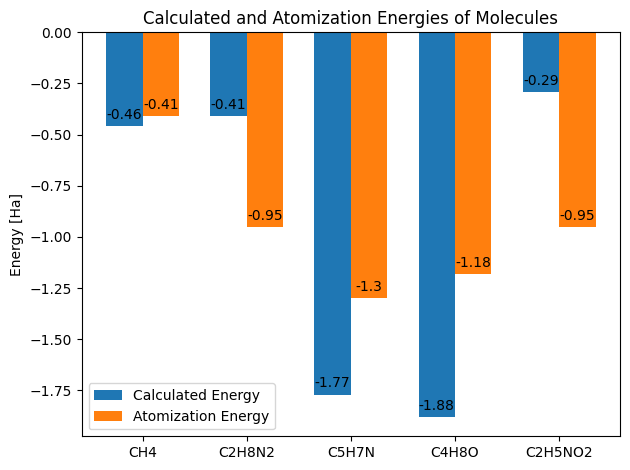

In [8]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
molecules = ["CH4", "C2H8N2", "C5H7N", "C4H8O", "C2H5NO2"]
calculated_energies = [-0.46, -0.41, -1.77, -1.88, -0.29]
atomization_energies = [-0.41, -0.95, -1.3, -1.18, -0.95]

x = np.arange(len(molecules))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, calculated_energies, width, label='Calculated Energy')
rects2 = ax.bar(x + width/2, atomization_energies, width, label='Atomization Energy')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy [Ha]')
ax.set_title('Calculated and Atomization Energies of Molecules')
ax.set_xticks(x)
ax.set_xticklabels(molecules)
ax.legend()

# Add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


c:\Users\lclai\miniconda3\envs\envlaia\Lib\site-packages\scipy\stats\_stats_py.py:6988: RuntimeWarning: invalid value encountered in scalar divide
  svar = ((n1 - 1) * v1 + (n2 - 1) * v2) / df


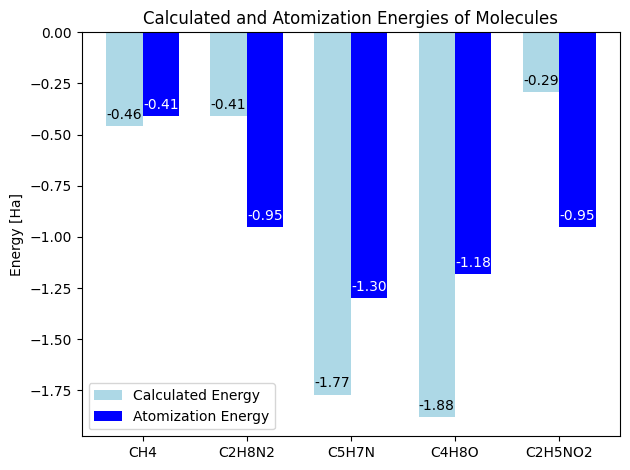

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

# Data from the table
molecules = ["CH4", "C2H8N2", "C5H7N", "C4H8O", "C2H5NO2"]
calculated_energies = [-0.46, -0.41, -1.77, -1.88, -0.29]
atomization_energies = [-0.41, -0.95, -1.3, -1.18, -0.95]

x = np.arange(len(molecules))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, calculated_energies, width, label='Calculated Energy', color='lightblue')
rects2 = ax.bar(x + width/2, atomization_energies, width, label='Atomization Energy', color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Energy [Ha]')
ax.set_title('Calculated and Atomization Energies of Molecules')
ax.set_xticks(x)
ax.set_xticklabels(molecules)
ax.legend()

# Add labels on top of the bars
def autolabel(rects, text_color):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom',
                    color=text_color)

autolabel(rects1, 'black')
autolabel(rects2, 'white')

# Perform t-test and annotate statistically significant differences
for i in range(len(molecules)):
    t_stat, p_value = ttest_ind([calculated_energies[i]], [atomization_energies[i]])
    if p_value < 0.05:
        x1, x2 = i - width/2, i + width/2
        y, h, col = max(calculated_energies[i], atomization_energies[i]) + 0.1, 0.05, 'black'
        ax.plot([x1, x1, x2, x2], [y - h, y, y, y - h], lw=0.75, c=col)
        ax.text((x1 + x2) * .5, y + h, "*", ha='center', va='bottom', color=col, fontsize=14)

fig.tight_layout()

plt.show()


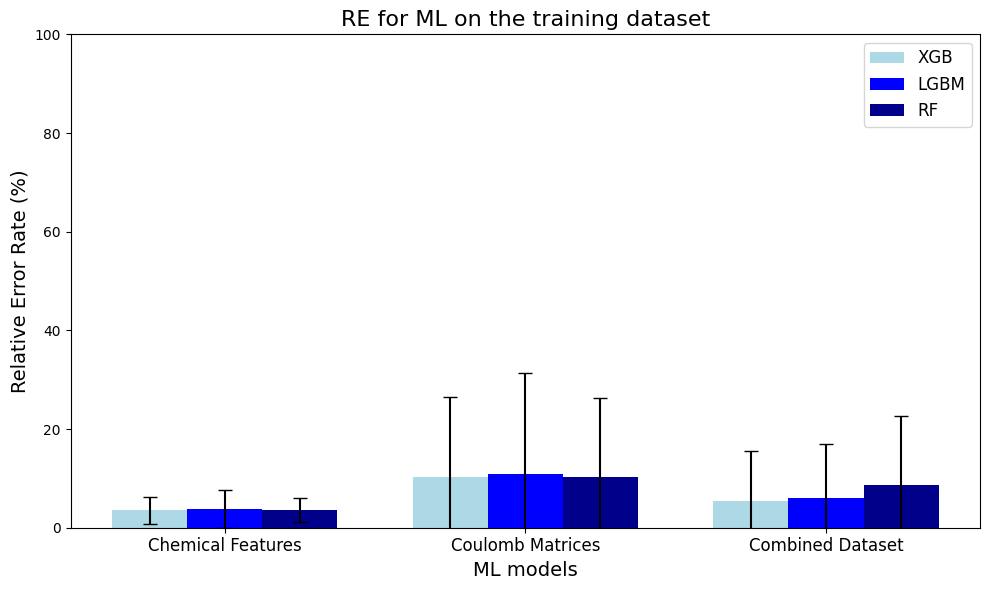

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
categories = ['Chemical Features', 'Coulomb Matrices', 'Combined Dataset']
algorithms = ['XGBoost', 'LightGBM', 'Random Forest']
data = {
    'XGBoost': [3.51, 10.25, 5.34],
    'LightGBM': [3.73, 10.91, 6.07],
    'Random Forest': [3.55, 10.3, 8.62]
}
errors = {
    'XGBoost': [2.67, 16.19, 10.15],
    'LightGBM': [3.84, 20.48, 10.80],
    'Random Forest': [2.45, 15.96, 14.05]
}

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, data['XGBoost'], width, yerr=errors['XGBoost'], label='XGB', capsize=5, color='lightblue')
rects2 = ax.bar(x, data['LightGBM'], width, yerr=errors['LightGBM'], label='LGBM', capsize=5, color='blue')
rects3 = ax.bar(x + width, data['Random Forest'], width, yerr=errors['Random Forest'], label='RF', capsize=5, color='darkblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_xlabel('ML models', fontsize=14)
ax.set_title('RE for ML on the training dataset', fontsize=16)
ax.set_ylim(0,100)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=12)

# Add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)



fig.tight_layout()

plt.show()


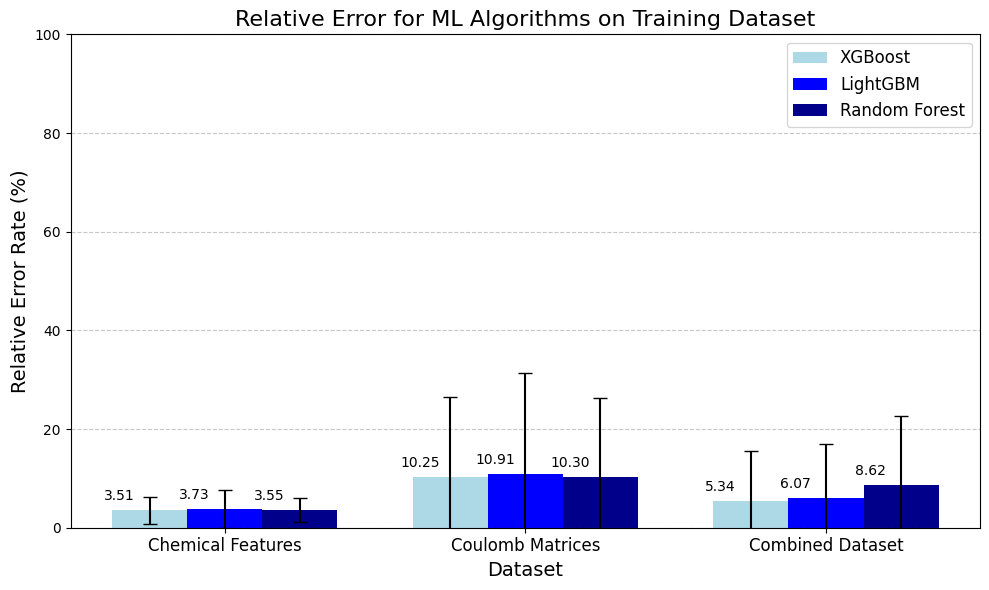

: 

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de la tabla
categories = ['Chemical Features', 'Coulomb Matrices', 'Combined Dataset']
algorithms = ['XGBoost', 'LightGBM', 'Random Forest']
data = {
    'XGBoost': [3.51, 10.25, 5.34],
    'LightGBM': [3.73, 10.91, 6.07],
    'Random Forest': [3.55, 10.3, 8.62]
}
errors = {
    'XGBoost': [2.67, 16.19, 10.15],
    'LightGBM': [3.84, 20.48, 10.80],
    'Random Forest': [2.45, 15.96, 14.05]
}

x = np.arange(len(categories))  # Ubicaciones de las etiquetas
width = 0.25  # Ancho de las barras

fig, ax = plt.subplots(figsize=(10, 6))

# Gráfica de barras con barras de error
rects1 = ax.bar(x - width, data['XGBoost'], width, yerr=errors['XGBoost'], label='XGBoost', capsize=5, color='lightblue')
rects2 = ax.bar(x, data['LightGBM'], width, yerr=errors['LightGBM'], label='LightGBM', capsize=5, color='blue')
rects3 = ax.bar(x + width, data['Random Forest'], width, yerr=errors['Random Forest'], label='Random Forest', capsize=5, color='darkblue')

# Personalización del gráfico
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_title('Relative Error for ML Algorithms on Training Dataset', fontsize=16)
ax.set_ylim(0, 100)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=12)

# Añadir una cuadrícula para facilitar la visualización
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Función para añadir etiquetas de valor al lado de las barras
def autolabel(rects):
    """Agregar una etiqueta de texto al lado de cada barra en *rects*, mostrando su altura."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() -0.48/ 2, height),
                    xytext=(3, 5),  # Ajustar el desplazamiento de las etiquetas
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10, color='black')

# Llamar a la función para cada conjunto de barras
autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()  # Ajustar el diseño para evitar la superposición

plt.show()


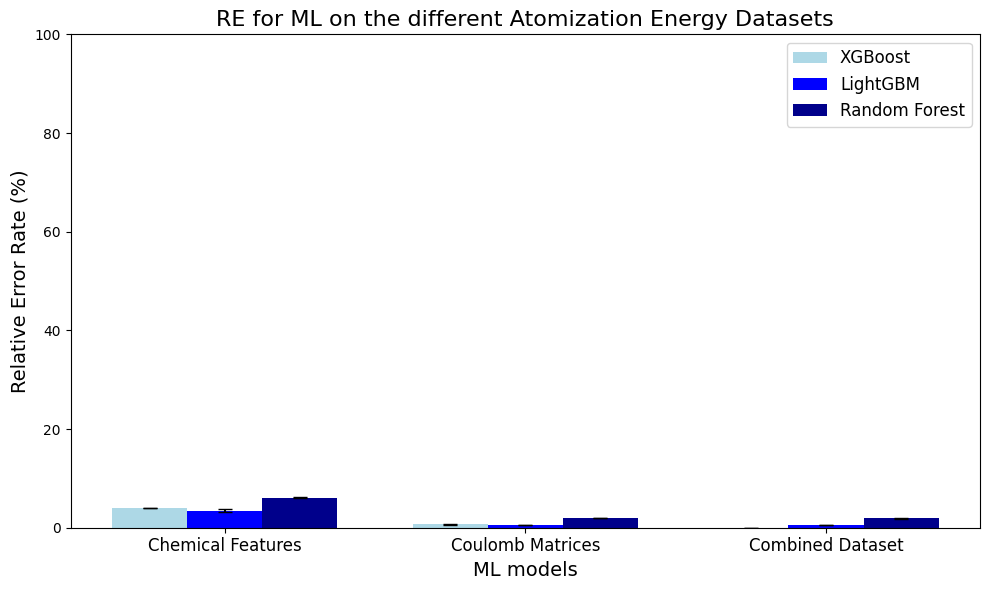

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
categories = ['Chemical Features', 'Coulomb Matrices', 'Combined Dataset']
algorithms = ['XGBoost', 'LightGBM', 'Random Forest']
data = {
    'XGBoost': [4.03, 0.66, 0.006],
    'LightGBM': [3.46, 0.63, 0.59],
    'Random Forest': [6.11, 1.94, 1.88]
}
errors = {
    'XGBoost': [0.047, 0.024, 0.00015],
    'LightGBM': [0.24, 0.0025,0.009 ],
    'Random Forest': [0.08, 0.021, 0.052 ]
}

x = np.arange(len(categories))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 6))

rects1 = ax.bar(x - width, data['XGBoost'], width, yerr=errors['XGBoost'], label='XGBoost', capsize=5, color='lightblue')
rects2 = ax.bar(x, data['LightGBM'], width, yerr=errors['LightGBM'], label='LightGBM', capsize=5, color='blue')
rects3 = ax.bar(x + width, data['Random Forest'], width, yerr=errors['Random Forest'], label='Random Forest', capsize=5, color='darkblue')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('RE for ML on the different Atomization Energy Datasets', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(categories, fontsize=12)
ax.legend(fontsize=12)
ax.set_xlabel('ML models', fontsize=14)
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_ylim(0,100)

# Add labels on top of the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=10)



fig.tight_layout()

plt.show()


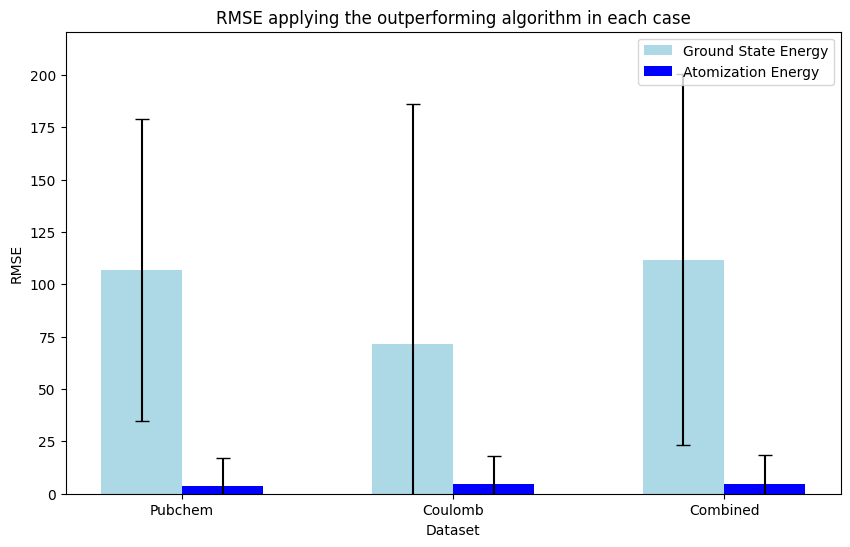

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los datos proporcionados
data = {
    'Energy Type': ['Ground State Energy', 'Ground State Energy', 'Ground State Energy', 
                    'Atomization Energy', 'Atomization Energy', 'Atomization Energy'],
    'Dataset': ['Pubchem', 'Coulomb', 'Combined', 'Pubchem', 'Coulomb', 'Combined'],
    'RMSE': [106.75, 71.43, 111.82, 3.52, 4.57, 4.61],
    'Std Dev': [72.19, 114.81, 88.74, 13.52, 13.61, 13.66]
}

df = pd.DataFrame(data)

# Definir los colores para cada tipo de energía
colors = {'Ground State Energy': 'lightblue', 'Atomization Energy': 'blue'}

# Graficar un barplot con barras de error
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada tipo de energía con barras de error
for i, energy_type in enumerate(df['Energy Type'].unique()):
    subset = df[df['Energy Type'] == energy_type]
    ax.bar(np.arange(len(subset)) + i*0.3, subset['RMSE'], yerr=subset['Std Dev'], 
           width=0.3, label=energy_type, color=colors[energy_type], capsize=5)

# Personalizar el gráfico
ax.set_title('RE applying the outperforming algorithm in each case')
ax.set_xlabel('Dataset')
ax.set_ylabel('RE')
ax.set_xticks(np.arange(len(df['Dataset'].unique())) + 0.3 / 2)
ax.set_xticklabels(df['Dataset'].unique())
ax.legend( loc='upper right')
ax.set_ylim(0, max(df['RMSE'] + df['Std Dev']) * 1.1)  # Establecer el límite inferior del eje y a 0 y ajustar el límite superior




plt.show()


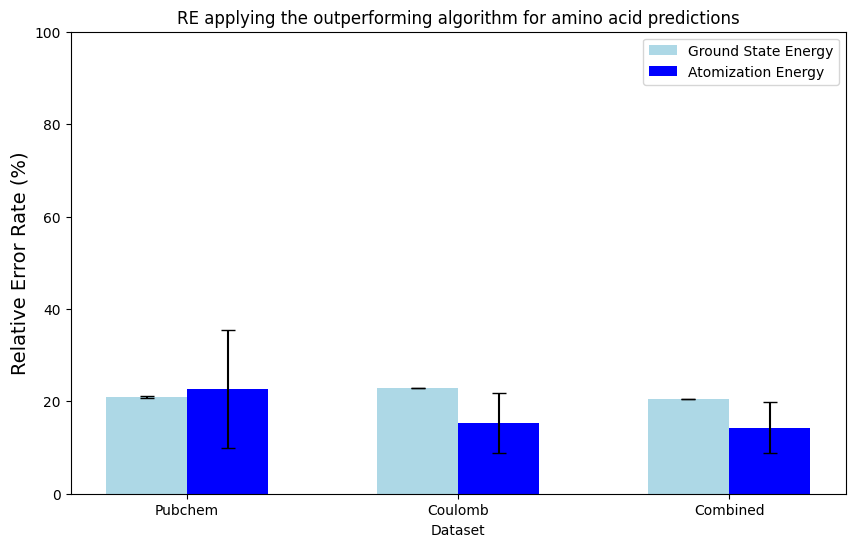

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los nuevos datos proporcionados
data = {
    'Energy Type': ['Ground State Energy', 'Ground State Energy', 'Ground State Energy', 
                    'Atomization Energy', 'Atomization Energy', 'Atomization Energy'],
    'Dataset': ['Pubchem', 'Coulomb', 'Combined', 'Pubchem', 'Coulomb', 'Combined'],
    'Relative Error %': [20.99, 22.82, 20.58, 22.7, 15.32, 14.32],
    'Std Dev': [0.23, 0.001, 0.01, 12.8, 6.51, 5.55]
}

df = pd.DataFrame(data)

# Definir los colores para cada tipo de energía
colors = {'Ground State Energy': 'lightblue', 'Atomization Energy': 'blue'}

# Graficar un barplot con barras de error
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada tipo de energía con barras de error
for i, energy_type in enumerate(df['Energy Type'].unique()):
    subset = df[df['Energy Type'] == energy_type]
    ax.bar(np.arange(len(subset)) + i*0.3, subset['Relative Error %'], yerr=subset['Std Dev'], 
           width=0.3, label=energy_type, color=colors[energy_type], capsize=5)

# Personalizar el gráfico
ax.set_title('RE applying the outperforming algorithm for amino acid predictions')
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_ylim(0,100)
ax.set_xlabel('Dataset')
ax.set_xticks(np.arange(len(df['Dataset'].unique())) + 0.3 / 2)
ax.set_xticklabels(df['Dataset'].unique())
ax.legend(loc='upper right')


plt.show()


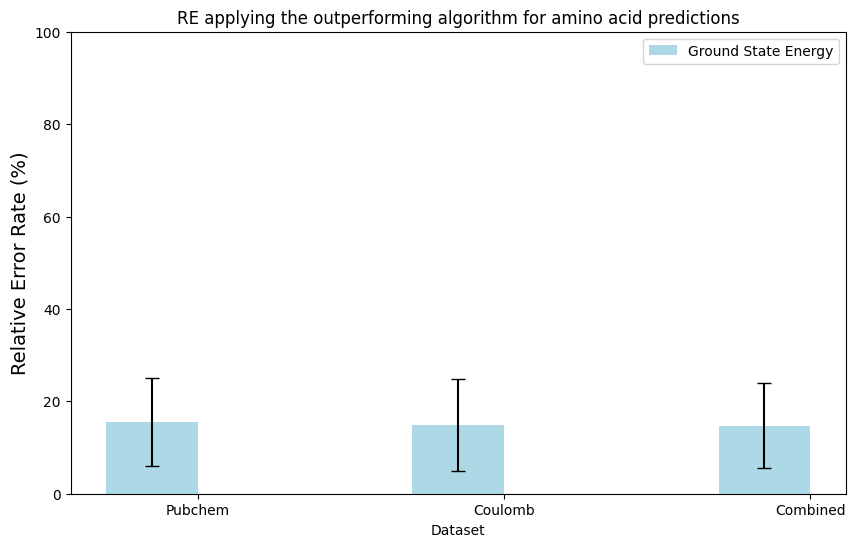

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los nuevos datos proporcionados
data = {
    'Energy Type': ['Ground State Energy', 'Ground State Energy', 'Ground State Energy', 
                    ],
    'Dataset': ['Pubchem', 'Coulomb', 'Combined'],
    'Relative Error %': [15.53, 14.87, 14.76],
    'Std Dev': [9.52, 9.93, 9.21]
}

df = pd.DataFrame(data)

# Definir los colores para cada tipo de energía
colors = {'Ground State Energy': 'lightblue'}

# Graficar un barplot con barras de error
fig, ax = plt.subplots(figsize=(10, 6))

# Graficar cada tipo de energía con barras de error
for i, energy_type in enumerate(df['Energy Type'].unique()):
    subset = df[df['Energy Type'] == energy_type]
    ax.bar(np.arange(len(subset)) + i*0.3, subset['Relative Error %'], yerr=subset['Std Dev'], 
           width=0.3, label=energy_type, color=colors[energy_type], capsize=5)

# Personalizar el gráfico
ax.set_title('RE applying the outperforming algorithm for amino acid predictions')
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_ylim(0,100)
ax.set_xlabel('Dataset')
ax.set_xticks(np.arange(len(df['Dataset'].unique())) + 0.3 / 2)
ax.set_xticklabels(df['Dataset'].unique())
ax.legend(loc='upper right')


plt.show()


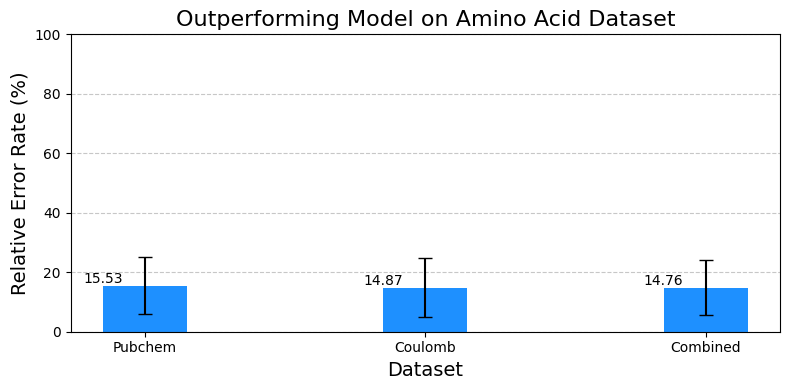

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Crear el DataFrame con los nuevos datos proporcionados
data = {
    'Energy Type': ['Ground State Energy', 'Ground State Energy', 'Ground State Energy'],
    'Dataset': ['Pubchem', 'Coulomb', 'Combined'],
    'Relative Error %': [15.53, 14.87, 14.76],
    'Std Dev': [9.52, 9.93, 9.21]
}

df = pd.DataFrame(data)

# Definir los colores para cada tipo de energía
colors = {'Ground State Energy': 'dodgerblue'}

# Graficar un barplot con barras de error
fig, ax = plt.subplots(figsize=(8, 4))

# Graficar cada tipo de energía con barras de error
for i, energy_type in enumerate(df['Energy Type'].unique()):
    subset = df[df['Energy Type'] == energy_type]
    bar_positions = np.arange(len(subset)) + i * 0.35  # Ajustar el espaciado
    bars = ax.bar(bar_positions, subset['Relative Error %'], 
                  yerr=subset['Std Dev'], width=0.3, 
                  label=energy_type, color=colors[energy_type], capsize=5)

    # Agregar etiquetas de valor sobre las barras
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() , yval , f"{yval:.2f}", 
                ha='center', va='bottom', fontsize=10)

# Personalizar el gráfico
ax.set_title('Outperforming Model on Amino Acid Dataset', fontsize=16)
ax.set_ylabel('Relative Error Rate (%)', fontsize=14)
ax.set_ylim(0, 100)
ax.set_xlabel('Dataset', fontsize=14)
ax.set_xticks(np.arange(len(df['Dataset'].unique())) + 0.001 / 2)
ax.set_xticklabels(df['Dataset'].unique())
ax.grid(axis='y', linestyle='--', alpha=0.7)  # Agregar líneas de cuadrícula

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño para evitar superposición
plt.show()


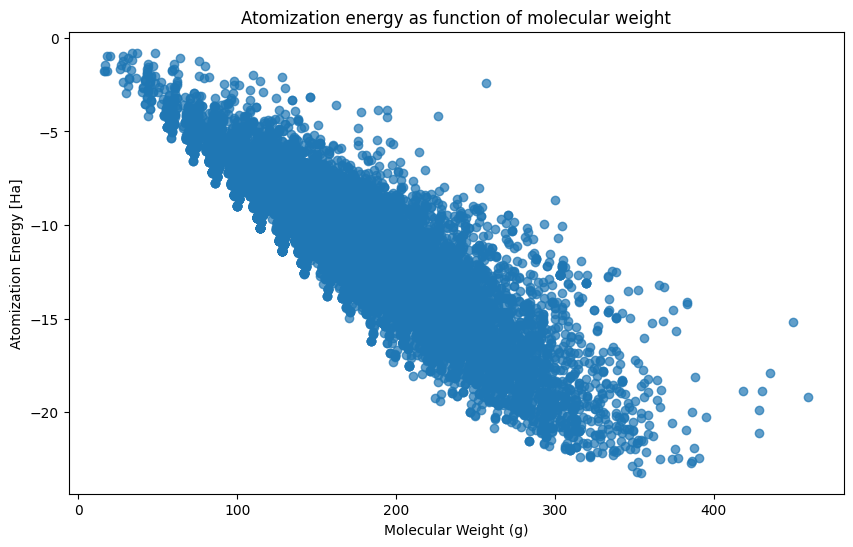

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:\\Users\\lclai\\Desktop\\LDIG\\DB\\training\\pubchem_atom.csv')

# Extract the relevant columns
mw = data['mw']
Eat = data['Eat']

# Plot Eat as a function of mw
plt.figure(figsize=(10, 6))
plt.scatter(mw, Eat, alpha=0.7)
plt.title('Atomization energy as function of molecular weight')
plt.xlabel('Molecular Weight (g)')
plt.ylabel('Atomization Energy [Ha]')
#plt.grid(True)
plt.show()

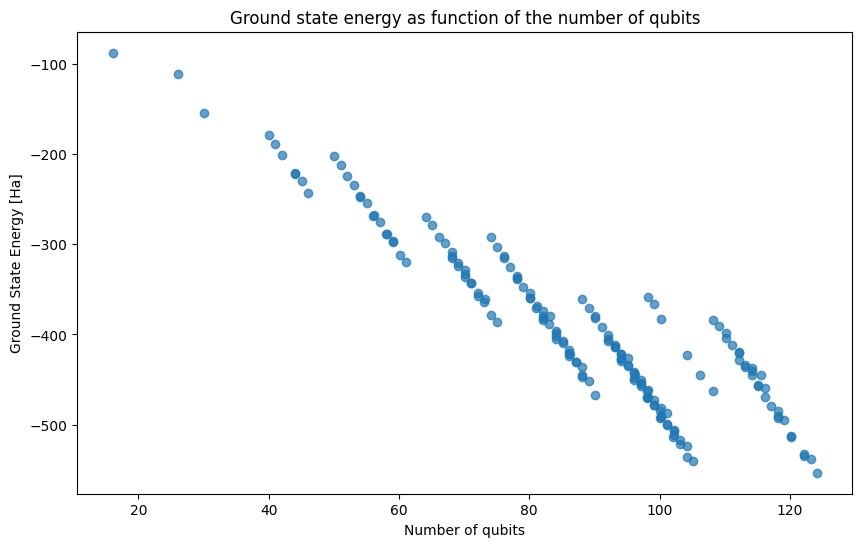

In [23]:
data = pd.read_csv('C:\\Users\\lclai\\Desktop\\LDIG\\DB\\training\\pubchem_gse.csv')

# Extract the relevant columns
mw = data['mw']
Eat = data['Eat']

# Plot Eat as a function of mw
plt.figure(figsize=(10, 6))
plt.scatter(mw, Eat, alpha=0.7)
plt.title('Ground state energy as function of the number of qubits')
plt.xlabel('Number of qubits')
plt.ylabel('Ground State Energy [Ha]')
#plt.grid(True)
plt.show()

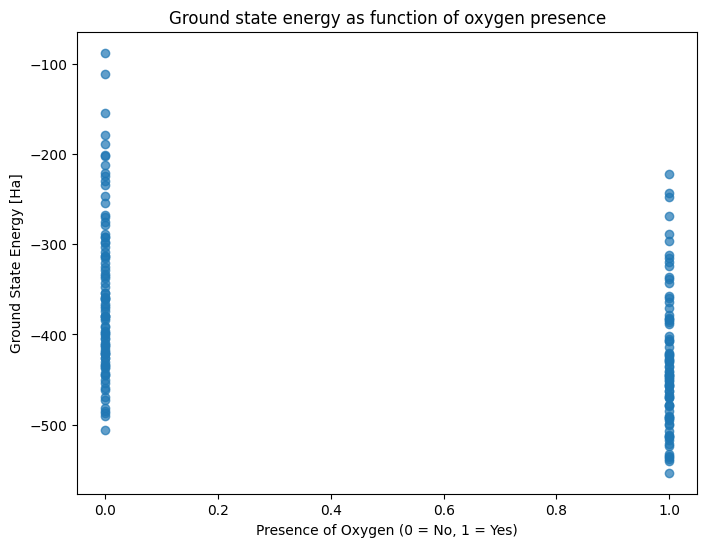

In [16]:
# Extract the relevant columns
oxygen_presence = data['O'] > 0
Eat = data['Eat']

# Plot Eat as a function of the presence of oxygen
plt.figure(figsize=(8, 6))
plt.scatter(oxygen_presence, Eat, alpha=0.7)
plt.title('Ground state energy as function of oxygen presence')
plt.xlabel('Presence of Oxygen (0 = No, 1 = Yes)')
plt.ylabel('Ground State Energy [Ha]')

plt.show()
